
<h1 style="font-family: 'poppins'; font-weight: bold; color: white;">Fake News Detection</h1>
<h3 style="font-family: 'poppins'; font-weight: bold; color: white;">👨‍💻Author: Hasnain Yaqoob</h3>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hasnainyaqub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainyaqooob)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hasnain-yaqoob-/)  


[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/Hasnain_Yaqoob_)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hasnainyaqkoob)
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@hasnainyaqub)  

[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/hasnain_yaqub/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hasnainyaqubakm@gmail.com)

In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# import data 
df_true = pd.read_csv('data/True.csv')
df_fake = pd.read_csv('data/Fake.csv')
df = pd.concat([df_true, df_fake]).reset_index(drop=True)
df['label'] = np.where(df.index < len(df_true), 1, 0)

In [12]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


label
0    23481
1    21417
Name: count, dtype: int64


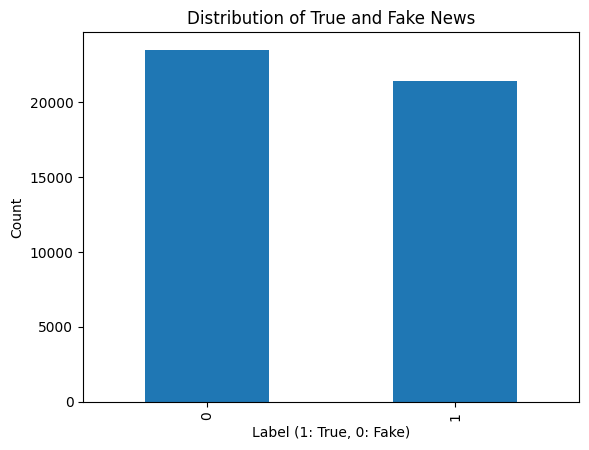

In [14]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of True and Fake News')
plt.xlabel('Label (1: True, 0: Fake)')
plt.ylabel('Count')
plt.show()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


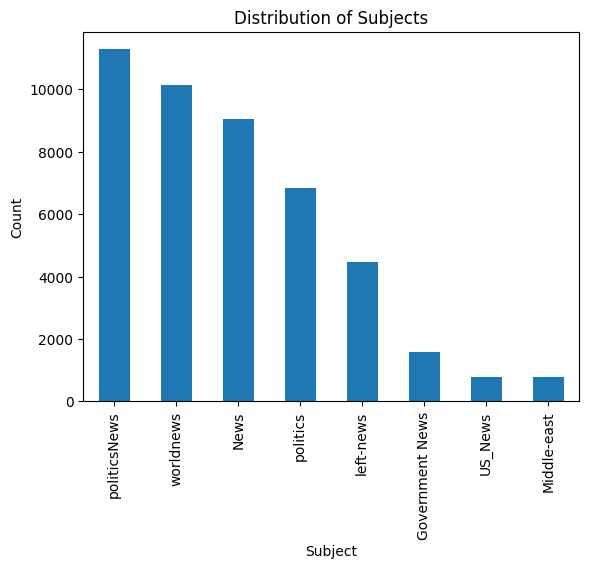

In [15]:
print(df['subject'].value_counts())
df['subject'].value_counts().plot(kind='bar')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

In [16]:
# combine title and text columns
df['text_combined'] = df['title'] + " " + df['text']

### Why I combined title and text columns?
- In most news articles, both title and text contain information that helps determine whether the article is fake or real.
    - The title often carries strong signals - fake news titles are usually sensational or exaggerated (“You won’t believe...”, “Shocking truth about...”).
    - The text (body) contains the main content that provides deeper context and writing style.
- This helps your model learn from both the tone of the title and the content of the article at once, instead of just one part.

In [28]:
import spacy
from spacy.util import minibatch
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # faster, no named entity or parser
nlp.max_length = 2000000  # handle long texts safely


In [29]:
from tqdm import tqdm
tqdm.pandas()

texts = df['text_combined'].astype(str).tolist()

# Parallel processing with spaCy pipe
docs = nlp.pipe(texts, n_process=4, batch_size=100)  # 4 cores
df['content_clean'] = [
    " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
    for doc in tqdm(docs, total=len(texts))
]

100%|██████████| 44898/44898 [07:14<00:00, 103.31it/s]


In [30]:
df.head()

,title,text,subject,date,label,text_combined,content_clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t...",budget fight loom Republicans flip fiscal scri...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...,military accept transgender recruit Monday Pen...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator let Mueller job WASH...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...,FBI Russia probe help australian diplomat tip ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...,trump want Postal Service charge Amazon shipme...


In [31]:
# let's split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['content_clean'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
) 

In [32]:
# we will use TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test) 

# Model Building

In [38]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



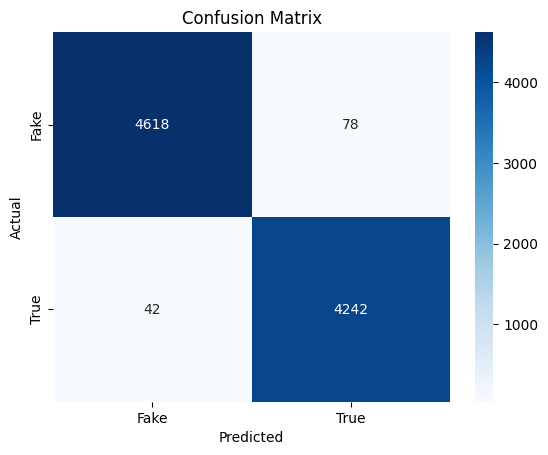

In [39]:
# evaluate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# evaluate with accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')  


Accuracy: 0.9866


In [ ]:
# export the model and vectorizer
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [42]:
# export dataset with cleaned content
df.to_csv('data/cleaned_fake_news_data.csv', index=False)